In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
properties = pd.read_csv('/content/drive/MyDrive/Inmersion de Datos - Python/inmuebles_bogota.csv')
properties = properties.rename(columns = {'Área':'Area','Baños':'Banos'})
price = properties.Valor.str.split(expand=True)
properties['Currency'] = price[0]
properties['Price'] = price[1]
properties.Price = properties.Price.str.replace('.','',regex = True).astype('float')
properties['Price_M'] = properties.Price / 1000000
properties['Price_M2_Million'] = properties.Price_M / properties.Area
properties.head(3)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Currency,Price,Price_M,Price_M2_Million
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000.00,360.00,5.14
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000.00,670.00,3.94
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000.00,1120.00,7.78


# **Solution challenge day 2**

In [53]:
#This approach groups the properties by neighborhood and calculates the average
#price per square meter by taking the mean of the price_per_sqm column. It is a
#simple and direct approach that can be useful if the distribution of property
#sizes in each neighborhood is relatively uniform.

properties.groupby('Barrio').mean()

,Habitaciones,Banos,Area,Price,Price_M,Price_M2_Million
Barrio,,,,,,
Alameda,3.00,2.00,97.00,580000000.00,580.00,5.98
Alhambra,3.00,2.94,190.41,752352941.18,752.35,4.33
Andes Norte,3.00,2.86,124.86,709571428.57,709.57,6.05
Antonio Nariño,4.31,2.50,163.06,459221875.00,459.22,3.53
Barrancas,2.87,2.13,70.20,314133333.33,314.13,4.42
...,...,...,...,...,...,...
Villa Maria,4.69,3.69,207.15,402846153.85,402.85,2.04
Villas De Granada,3.45,2.32,86.59,282301136.36,282.30,3.17
Villemar,2.94,2.06,76.89,303833333.33,303.83,3.99


In [88]:
#This approach groups the properties by neighborhood and calculates the total 
#price and area for each neighborhood using the groupby() method. Then, the 
#average price per square meter for each neighborhood is calculated by dividing
#the total price by the total area. This approach is more robust and can be more
#accurate if the distribution of property sizes in each neighborhood is very
#varied or if you want to compare the average price per square meter across 
#neighborhoods with properties of different sizes.
sum_data_properties = properties.groupby('Barrio').sum()
price_m2_neighborhood = sum_data_properties.Price_M / sum_data_properties.Area
price_m2_neighborhood

Barrio
Alameda              5.98
Alhambra             3.95
Andes Norte          5.68
Antonio Nariño       2.82
Barrancas            4.47
                     ... 
Villa Maria          1.94
Villas De Granada    3.26
Villemar             3.95
Zona Franca          2.96
Zona Noroccidental   4.57
Length: 149, dtype: float64

In [59]:
#Add price_m2_neighborhood to properties dataframe
#We are going to create a new column price_m2_neighborhood and first assign
#the neighborhood name to this column, then we will replace the original 
#neighborhood names with their corresponding price_m2 values in the new column
#with the map function
properties['price_m2_neighborhood'] = properties.Barrio
properties['price_m2_neighborhood'] = properties['price_m2_neighborhood'].map(dict(price_m2_neighborhood))
properties

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Currency,Price,Price_M,Price_M2_Million,price_m2_neighborhood
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000.00,360.00,5.14,4.57
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000.00,670.00,3.94,3.40
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000.00,1120.00,7.78,8.10
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000.00,890.00,5.78,5.66
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000.00,970.00,7.58,6.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000.00,290.00,4.14,3.38
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000.00,670.00,6.70,6.11
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900000000.00,900.00,2.35,2.92
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000.00,335.00,1.83,2.89


In [66]:
#Now, sum_data_properties has as index the column Barrio
sum_data_properties


,Habitaciones,Banos,Area,Price,Price_M,Price_M2_Million
Barrio,,,,,,
Alameda,3,2,97,580000000.00,580.00,5.98
Alhambra,51,50,3237,12790000000.00,12790.00,73.56
Andes Norte,21,20,874,4967000000.00,4967.00,42.35
Antonio Nariño,207,120,7827,22042650000.00,22042.65,169.47
Barrancas,43,32,1053,4712000000.00,4712.00,66.24
...,...,...,...,...,...,...
Villa Maria,61,48,2693,5237000000.00,5237.00,26.58
Villas De Granada,76,51,1905,6210625000.00,6210.62,69.71
Villemar,53,37,1384,5469000000.00,5469.00,71.81


In [67]:
#To add a new column as index we can use reset_index function
sum_data_properties.reset_index(inplace=True)
sum_data_properties

,Barrio,Habitaciones,Banos,Area,Price,Price_M,Price_M2_Million
0,Alameda,3,2,97,580000000.00,580.00,5.98
1,Alhambra,51,50,3237,12790000000.00,12790.00,73.56
2,Andes Norte,21,20,874,4967000000.00,4967.00,42.35
3,Antonio Nariño,207,120,7827,22042650000.00,22042.65,169.47
4,Barrancas,43,32,1053,4712000000.00,4712.00,66.24
...,...,...,...,...,...,...,...
144,Villa Maria,61,48,2693,5237000000.00,5237.00,26.58
145,Villas De Granada,76,51,1905,6210625000.00,6210.62,69.71
146,Villemar,53,37,1384,5469000000.00,5469.00,71.81
147,Zona Franca,2,1,54,160000000.00,160.00,2.96


In [71]:
#Get the top 10 neighborhoods with more properties
top_10_neighborhoods = properties.Barrio.value_counts().head(10).index
top_10_neighborhoods

Index(['Usaquén', 'Zona Noroccidental', 'Bosa', 'Kennedy', 'Cedritos',
       'Barrios Unidos', 'Engativa', 'Suba', 'Santa Barbara', 'Chapinero'],
      dtype='object')

In [89]:
#Convert price_m2_neighborhood from Series to Frame and rename columns
price_m2_neighborhood = price_m2_neighborhood.to_frame().reset_index()
price_m2_neighborhood.columns = ['neighborhood', 'price_m2']
price_m2_neighborhood

,neighborhood,price_m2
0,Alameda,5.98
1,Alhambra,3.95
2,Andes Norte,5.68
3,Antonio Nariño,2.82
4,Barrancas,4.47
...,...,...
144,Villa Maria,1.94
145,Villas De Granada,3.26
146,Villemar,3.95
147,Zona Franca,2.96


In [93]:
#Filter only top 10 neighborhood
top_10_price_m2_neighborhood = price_m2_neighborhood.query('neighborhood in @top_10_neighborhoods')
top_10_price_m2_neighborhood

,neighborhood,price_m2
5,Barrios Unidos,2.96
10,Bosa,2.68
22,Cedritos,5.03
24,Chapinero,4.58
50,Engativa,2.89
63,Kennedy,3.38
125,Santa Barbara,5.85
132,Suba,4.32
138,Usaquén,5.66
148,Zona Noroccidental,4.57


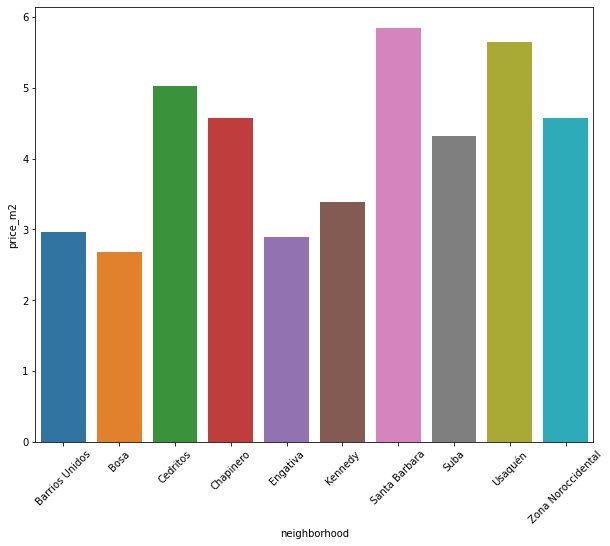

In [97]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='neighborhood', y='price_m2',data=top_10_price_m2_neighborhood)
ax.tick_params(axis='x', rotation=45)

In [102]:
properties_top_10_neighborhood = properties.query('Barrio in @top_10_neighborhoods')
properties_top_10_neighborhood


,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Currency,Price,Price_M,Price_M2_Million,price_m2_neighborhood
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000.00,360.00,5.14,4.57
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000.00,890.00,5.78,5.66
14,Apartamento,Apartamento en venta en Kennedy,4,3,98,Kennedy,Kennedy Central,$ 680.000.000,$,680000000.00,680.00,6.94,3.38
15,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,$,2519000000.00,2519.00,8.40,4.57
18,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000.00,239.00,5.31,4.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,Apartamento,Apartamento en venta en Usaquén,3,3,180,Usaquén,Usaquén,$ 1.250.000.000,$,1250000000.00,1250.00,6.94,5.66
9512,Casa,Casa en venta en Kennedy,7,4,270,Kennedy,Kennedy Central,$ 615.000.000,$,615000000.00,615.00,2.28,3.38
9514,Casa,Casa en venta en Kennedy,4,2,240,Kennedy,Kennedy Central,$ 555.000.000,$,555000000.00,555.00,2.31,3.38
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000.00,290.00,4.14,3.38


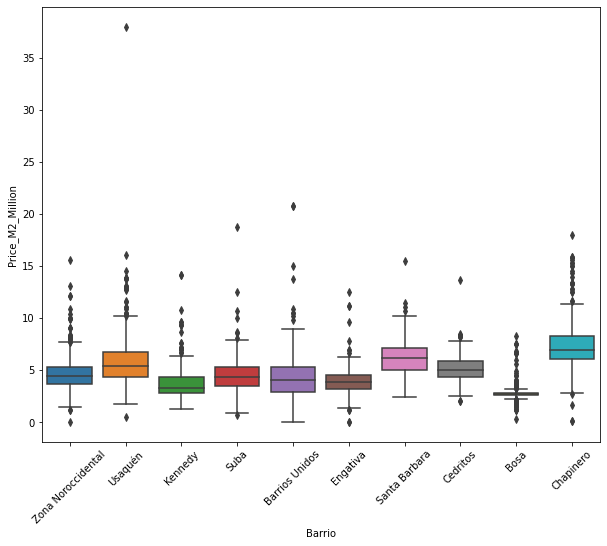

In [103]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio', y='Price_M2_Million',data=properties_top_10_neighborhood)
ax.tick_params(axis='x', rotation=45)
plt.show()

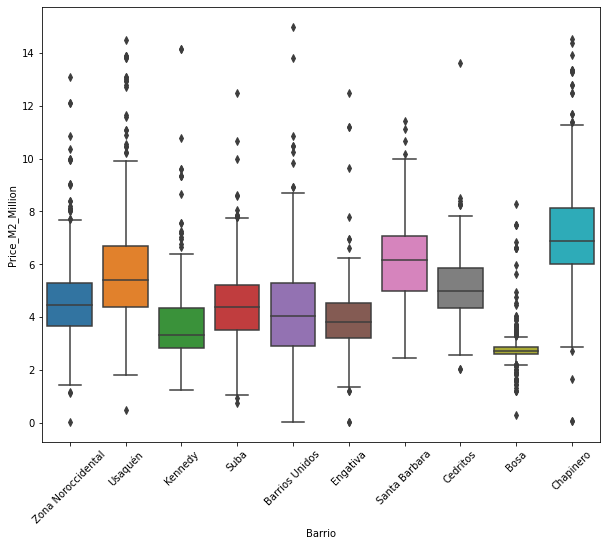

In [109]:
#We can filter 'Outlier', which is a data significantly different from other 
#data in a dataset, for example a property with an extremely high or low price 
#per square meter compared to the average price per square meter in that 
#neighborhood.

plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio', y='Price_M2_Million',data= properties.query('Barrio in @top_10_neighborhoods & Price_M2_Million < 15'))
ax.tick_params(axis='x', rotation=45)
plt.show()

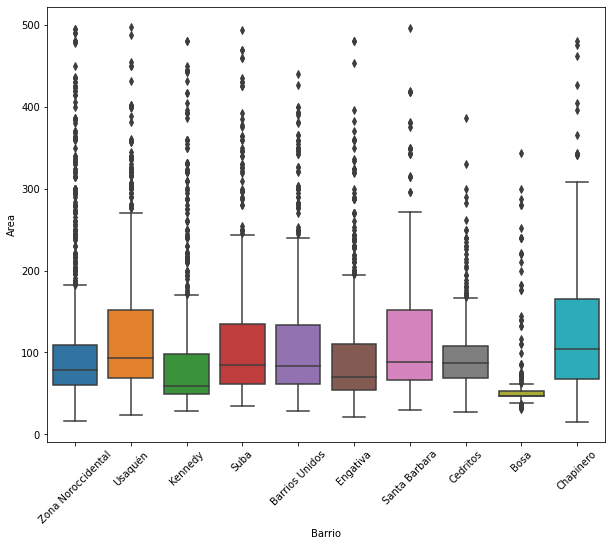

In [108]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio', y='Area',data= properties.query('Barrio in @top_10_neighborhoods & Area < 500'))
ax.tick_params(axis='x', rotation=45)
plt.show()

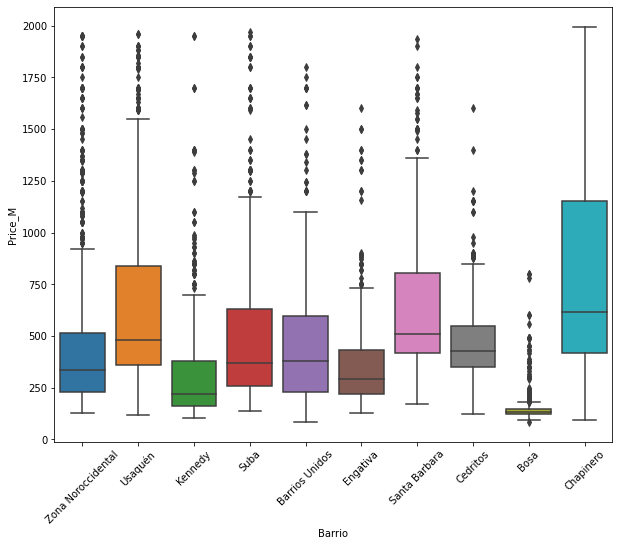

In [112]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio', y='Price_M',data= properties.query('Barrio in @top_10_neighborhoods & Price_M < 2000'))
ax.tick_params(axis='x', rotation=45)
plt.show()

# **CONCLUSION**
among the top 10 neighborhoods with the most properties in Bogota, Chapinero has the biggest properties, the highest prices, and the most expensive price per square meter among the neighborhood.


# **ADD NEW DATASET IN ORDER TO IMPROVE CONCLUSIONS**

In [3]:
survey_A = pd.read_csv('/content/drive/MyDrive/Inmersion de Datos - Python/Identificación (Capítulo A).csv', sep=';', encoding='latin-1')
survey_B = pd.read_csv('/content/drive/MyDrive/Inmersion de Datos - Python/Datos de la vivenda y su entorno (Cap¡tulo B).csv', sep=';', encoding='latin-1')
survey_C = pd.read_csv('/content/drive/MyDrive/Inmersion de Datos - Python/Condiciones habitacionales del hogar (Cap¡tulo C).csv', sep=';', encoding='latin-1')
survey_D = pd.read_csv('/content/drive/MyDrive/Inmersion de Datos - Python/Composiciขn del hogar y demografกa (Capกtulo E).csv', sep=';', encoding='latin-1')
survey_E = pd.read_csv('/content/drive/MyDrive/Inmersion de Datos - Python/Educaciขn (Capกtulo H).csv', sep=';', encoding='latin-1')
survey_F = pd.read_csv('/content/drive/MyDrive/Inmersion de Datos - Python/Percepciขn sobre las condiciones de vida y el desempeคo institucional (Capกtulo L).csv', sep=';', encoding='latin-1')
survey_G = pd.read_csv('/content/drive/MyDrive/Inmersion de Datos - Python/Fuerza de trabajo (Cap¡tulo K).csv', sep=';', encoding='latin-1')



<ipython-input-3-6f62f5396122>:3: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  survey_C = pd.read_csv('/content/drive/MyDrive/Inmersion de Datos - Python/Condiciones habitacionales del hogar (Cap¡tulo C).csv', sep=';', encoding='latin-1')
<ipython-input-3-6f62f5396122>:4: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  survey_D = pd.read_csv('/content/drive/MyDrive/Inmersion de Datos - Python/Composiciขn del hogar y demografกa (Capกtulo E).csv', sep=';', encoding='latin-1')
<ipython-input-3-6f62f5396122>:5: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  survey_E = pd.read_csv('/content/drive/MyDrive/Inmersion de Datos - Python/Educaciขn (Capกtulo H).csv', sep=';', encoding='latin-1')
<ipython-input-3-6f62f5396122>:6: DtypeWarning: Columns (114,117,122,126,164,166,168) have mixed types. Specify dtype option on im

In [123]:
survey_A.shape

(106467, 11)

In [4]:
survey_A = survey_A.loc[survey_A.MPIO == 11001]
survey_A.shape

(86504, 11)

In [ ]:
dane_data = pd.merge(survey_A,survey_B, on='DIRECTORIO',how='left')
dane_data = pd.merge(dane_data,survey_C, on='DIRECTORIO',how='left')
dane_data = pd.merge(dane_data,survey_D, on='DIRECTORIO',how='left')
dane_data = pd.merge(dane_data,survey_E, on='DIRECTORIO',how='left')
dane_data = pd.merge(dane_data,survey_F, on='DIRECTORIO',how='left')
dane_data = pd.merge(dane_data,survey_G, on='DIRECTORIO',how='left')
dane_data.info()

<ipython-input-5-6ffa47f366cf>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  dane_data = pd.merge(dane_data,survey_D, on='DIRECTORIO',how='left')
<ipython-input-5-6ffa47f366cf>:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'SECUENCIA_P_x', 'FEX_C_x', 'DIRECTORIO_HOG_x'} in the result is deprecated and will raise a MergeError in a future version.
  dane_data = pd.merge(dane_data,survey_F, on='DIRECTORIO',how='left')
